In [93]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
audio = AudioSegment.from_file("Sample.m4a", "m4a")

In [21]:
# pydub does things in milliseconds
ten_seconds = 10 * 1000

first_10_seconds = audio[:ten_seconds]

In [22]:
first_10_seconds

In [23]:
# boost volume by 6dB
beginning = first_10_seconds + 6

In [24]:
beginning

In [25]:
first_second = audio[:1000]
first_array = np.array(first_second.get_array_of_samples())

(0, 2.5)

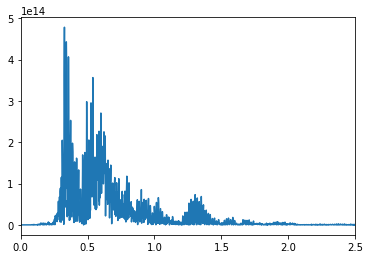

In [68]:
time_step = 1 / 300.
sample = np.array(audio.get_array_of_samples())
ps = np.abs(np.fft.fft(sample))**2
freq = np.fft.fftfreq(sample.size, time_step)
idx = np.argsort(freq)
plt.plot(freq[idx], ps[idx])
plt.xlim([0,2.5])

In [66]:
sample.size

130048

In [64]:
freq

array([ 0.        ,  0.00230684,  0.00461368, ..., -0.00692052,
       -0.00461368, -0.00230684])

In [69]:
sample

array([  0,   0,   0, ..., -54, -64, -97])

(0, 30000)

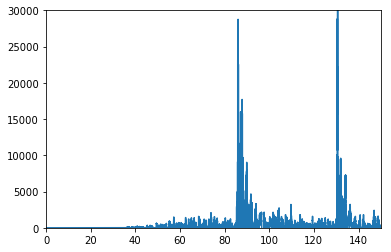

In [92]:
time_step = 1/300.
sample = np.array(audio.get_array_of_samples())
freq = np.fft.fftfreq(sample.size, time_step)
idx = np.argsort(freq)
plt.plot(freq[idx], sample[idx])
plt.xlim([0,150])
plt.ylim([0, 30000])

## Spectrograms

In [151]:
luana = AudioSegment.from_file("luana.wav", "wav")
julie = AudioSegment.from_file("julie.m4a", "m4a")
brent = AudioSegment.from_file("brent.m4a", "m4a")
ambient = AudioSegment.from_file("ambient.m4a", "m4a")

In [192]:
# pydub does things in milliseconds
luana_bark = luana[6000:7000]
julie_bark = julie[1000:2000]
brent_bark = brent[9500:10500]
ambient_noise = ambient[1000:2000]

In [120]:
luana_bark

In [122]:
julie_bark

In [126]:
brent_bark

In [193]:
ambient_noise

In [160]:
luana_dict = {}
# get raw audio data as a bytestring
raw_data = luana.raw_data
# get the frame rate
luana_dict["sample_rate"] = luana.frame_rate
# get amount of bytes contained in one sample
luana_dict["sample_size"] = luana.sample_width
# get channels
luana_dict["channels"] = luana.channels
for item in luana_dict.items():
    print '%15s = %d' % item


       channels = 1
    sample_size = 2
    sample_rate = 22050


In [183]:
import librosa
import librosa.display

def spectro(filename):
    # Load the audio as a waveform `y`
    # Store the sampling rate as `sr`
    y, sr = librosa.load(filename)
    D = librosa.stft(y) # short time fourier trans
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time')
    plt.title("Power Spectrogram: " + filename)
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()

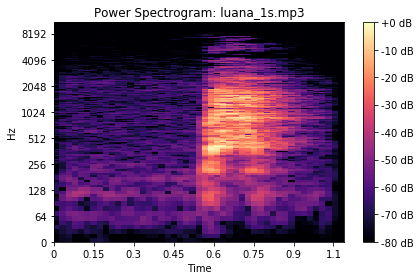

In [187]:
spectro("luana_1s.mp3")

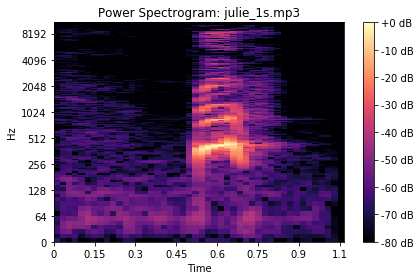

In [188]:
spectro("julie_1s.mp3")

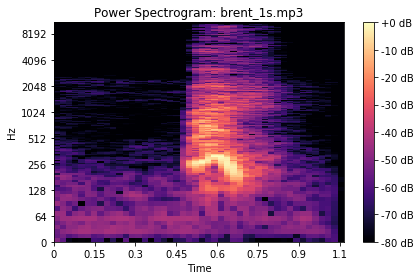

In [189]:
spectro("brent_1s.mp3")

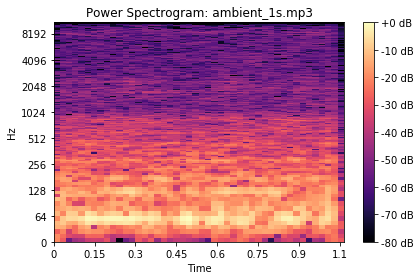

In [194]:
spectro("ambient_1s.mp3")